# import data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")#, force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/AI_Summit2021-PreHackthon

/content/gdrive/MyDrive/AI_Summit2021-PreHackthon


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
train = pd.read_csv('train_dataset.csv')

#test = pd.read_csv('train_dataset.csv')
#test=test.drop('next_month_plan',axis=1)
test = pd.read_csv('test_dataset.csv')

# 1.   Missing values: 10500
```
dusage_avg 92%,vusage_onnet_avg17%,vusage_offnet_avg 68%
```





* dusage_avg - 9642 -Skewed -Median
* vusage_onnet_avg - 1828 -Skewed -Median
* vusage_offnet_avg- 7187 -Skewed -Median
* add_on_tot_rental	- 6667 -Skewed -0
* add_on_count - 6667 - Skewed -0

* device_type 23 - Skewed - Mode
* device_category 30 - Skewed - Mode
* gender 135 - Skewed - Mode
* age_group 135 - Skewed - Mode

In [ ]:
train.dusage_avg.fillna(train.dusage_avg.median(),inplace=True)
train.vusage_onnet_avg.fillna(train.vusage_onnet_avg.median(),inplace=True)
train.vusage_offnet_avg.fillna(train.vusage_offnet_avg.median(),inplace=True)
train.add_on_tot_rental.fillna(0,inplace=True)#train.add_on_tot_rental.median(),inplace=True)
train.add_on_count.fillna(0,inplace=True)#train.add_on_count.median(),inplace=True)

train.device_type.fillna(str(train.device_type.mode()),inplace=True)
train.device_category.fillna(str(train.device_category.mode()),inplace=True)
train.gender.fillna(str(train.gender.mode()),inplace=True)
train.age_group.fillna(str(train.age_group.mode()),inplace=True)

In [ ]:
test.dusage_avg.fillna(train.dusage_avg.median(),inplace=True)
test.vusage_onnet_avg.fillna(train.vusage_onnet_avg.median(),inplace=True)
test.vusage_offnet_avg.fillna(train.vusage_offnet_avg.median(),inplace=True)
test.add_on_tot_rental.fillna(0,inplace=True)#train.add_on_tot_rental.median(),inplace=True)
test.add_on_count.fillna(0,inplace=True)#train.add_on_count.median(),inplace=True)

test.device_type.fillna(str(train.device_type.mode()),inplace=True)
test.device_category.fillna(str(train.device_category.mode()),inplace=True)
test.gender.fillna(str(train.gender.mode()),inplace=True)
test.age_group.fillna(str(train.age_group.mode()),inplace=True)

In [ ]:
print(train.shape)
train.isnull().sum()

(10500, 31)


primary_identifier             0
device_type                    0
device_category                0
gender                         0
district_name                  0
age_group                      0
network_stay                   0
average_monthly_bill_amount    0
dusage_sum                     0
dusage_min                     0
dusage_max                     0
dusage_avg                     0
dusage_days                    0
dusage_stddev                  0
vusage_onnet_sum               0
vusage_onnet_max               0
vusage_onnet_min               0
vusage_onnet_days              0
vusage_onnet_avg               0
vusage_onnet_stddev            0
vusage_offnet_sum              0
vusage_offnet_max              0
vusage_offnet_min              0
vusage_offnet_days             0
vusage_offnet_avg              0
vusage_offnet_stddev           0
number_of_fixed_bb_accounts    0
number_of_iptv_accounts        0
add_on_tot_rental              0
add_on_count                   0
next_month

In [ ]:
print(test.shape)
test.isnull().sum()

(4500, 30)


primary_identifier             0
device_type                    0
device_category                0
gender                         0
district_name                  0
age_group                      0
network_stay                   0
average_monthly_bill_amount    0
dusage_sum                     0
dusage_min                     0
dusage_max                     0
dusage_avg                     0
dusage_days                    0
dusage_stddev                  0
vusage_onnet_sum               0
vusage_onnet_max               0
vusage_onnet_min               0
vusage_onnet_days              0
vusage_onnet_avg               0
vusage_onnet_stddev            0
vusage_offnet_sum              0
vusage_offnet_max              0
vusage_offnet_min              0
vusage_offnet_days             0
vusage_offnet_avg              0
vusage_offnet_stddev           0
number_of_fixed_bb_accounts    0
number_of_iptv_accounts        0
add_on_tot_rental              0
add_on_count                   0
dtype: int

# Encoding

Label Encoding

In [ ]:
df_train_enc=train
df_test_enc=test

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train_enc['next_month_plan']=le.fit_transform(train['next_month_plan'])

In [ ]:
#le.classes_
le.inverse_transform([0,1,2,3,4,5,6])
# dict(zip(le.inverse_transform([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6]))

array(['PKG1', 'PKG2', 'PKG3', 'PKG4', 'PKG5', 'PKG6', 'PKG7'],
      dtype=object)

categorical data encoding

In [ ]:
!pip install category_encoders
import category_encoders as ce
cat_feat = ['age_group','gender','device_type','device_category' ,'district_name']
df_train_enc=df_train_enc.drop(cat_feat,axis=1,inplace=False)
df_test_enc=df_test_enc.drop(cat_feat,axis=1,inplace=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# create object of Ordinalencoding
ageencoder= ce.OrdinalEncoder(cols=['age_group'],return_df=True,mapping=[{'col':'age_group','mapping':{'<20':20,'20-30':20,'30-40':40,'40-50':50,'50-60':60,'60-70':70,'>70':80}}])
df_train_enc['age_group'] = ageencoder.fit_transform(train['age_group'])
df_test_enc['age_group'] = ageencoder.fit_transform(test['age_group'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
#gender with binary encoding
#gendencorder=ce.BinaryEncoder(cols=['gender'],return_df=True)
gendencorder=ce.OrdinalEncoder(cols=['gender'],return_df=True,mapping=[{'col':'gender','mapping':{'MALE':1,'FEMALE':0}}])
df_train_enc['gender'] = gendencorder.fit_transform(train['gender'])
df_test_enc['gender'] = gendencorder.fit_transform(test['gender'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
#device_type with Binary encoding
#devtypeencorder=ce.HashingEncoder(cols='device_type',n_components=2)
devtypeencorder=ce.BinaryEncoder(cols=['device_type'])
df_devtypeencorder = devtypeencorder.fit_transform(train['device_type'])
df_train_enc = pd.concat([df_train_enc, df_devtypeencorder], axis=1)
print(df_devtypeencorder.shape)

df_devtypeencorder = devtypeencorder.transform(test['device_type'])
df_test_enc = pd.concat([df_test_enc, df_devtypeencorder], axis=1)
print(df_devtypeencorder.shape)

(10500, 3)
(4500, 3)


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
"""
#device_type with Binary encoding
devcatencoder=ce.BinaryEncoder(cols=['device_category'])
df_devcatencoder = devcatencoder.fit_transform(train['device_category'])
df_devcatencoder
#df_train_enc = pd.concat([df_train_enc, df_devcatencoder], axis=1)
#df_train_enc=df_train_enc.drop('device_category',axis=1,inplace=False)
#print(df_train_enc[['device_type_0','device_type_1','device_type_2']])
"""

"\n#device_type with Binary encoding\ndevcatencoder=ce.BinaryEncoder(cols=['device_category'])\ndf_devcatencoder = devcatencoder.fit_transform(train['device_category'])\ndf_devcatencoder\n#df_train_enc = pd.concat([df_train_enc, df_devcatencoder], axis=1)\n#df_train_enc=df_train_enc.drop('device_category',axis=1,inplace=False)\n#print(df_train_enc[['device_type_0','device_type_1','device_type_2']])\n"

In [ ]:
devcatencoder= ce.BaseNEncoder(cols=['device_category'],return_df=True,base=3)
df_devcatencoder = devcatencoder.fit_transform(train['device_category'])
df_train_enc = pd.concat([df_train_enc, df_devcatencoder], axis=1)
print(df_devcatencoder.shape)

df_devcatencoder = devcatencoder.transform(test['device_category'])
df_test_enc = pd.concat([df_test_enc, df_devcatencoder], axis=1)
print(df_devcatencoder.shape)
#print(df_train_enc[['device_category_0','device_category_1','device_category_2']])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(10500, 3)
(4500, 3)


In [ ]:
districtencoder= ce.BaseNEncoder(cols=['district_name'],return_df=True,base=5)
df_districtencoder = districtencoder.fit_transform(train['district_name'])
df_train_enc = pd.concat([df_train_enc, df_districtencoder], axis=1)
print(df_districtencoder.shape)

df_districtencoder = districtencoder.transform(test['district_name'])
df_test_enc = pd.concat([df_test_enc, df_districtencoder], axis=1)
print(df_districtencoder.shape)
#print(df_train_enc[['district_name_0','district_name_1','district_name_2','district_name_3']])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(10500, 4)
(4500, 4)


In [ ]:
print(df_train_enc.shape)
print(df_test_enc.shape)

(10500, 38)
(4500, 37)


# oversampling SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

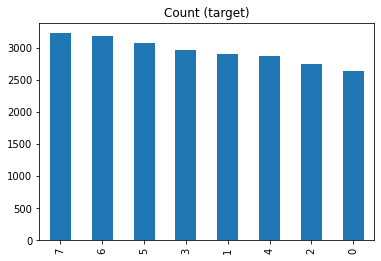

In [ ]:
from imblearn.combine import SMOTETomek

X_feat=df_train_enc.drop('next_month_plan',axis=1)
Y_feat=df_train_enc['next_month_plan']

smote = SMOTETomek(ratio='auto')
X_sm, y_sm = smote.fit_sample(X_feat, Y_feat)

X_sm = pd. DataFrame(X_sm, columns=list(X_feat.columns))
y_sm = pd. DataFrame(y_sm, columns=['next_month_plan'])
df_train_smt = pd.concat([X_sm,y_sm], axis=1)
df_train_smt.next_month_plan.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
df_train_smt.head()

,primary_identifier,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,age_group,gender,device_type_0,device_type_1,device_type_2,device_category_0,device_category_1,device_category_2,district_name_0,district_name_1,district_name_2,district_name_3,next_month_plan
0,3563570.0,186.0,1565.55,18581.0,48.193713,2739.515326,619.378810,30.0,619.750500,0.0,0.0,0.0,0.0,9.277778,0.0,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5
1,1853666.0,24.0,2397.49,91071.0,22.437842,7523.355693,3035.708609,30.0,2174.203127,0.0,0.0,0.0,0.0,9.277778,0.0,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,1110.0,2.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3
2,2794331.0,37.0,2501.75,19736.0,53.302092,1239.220170,657.889802,30.0,329.152516,0.0,0.0,0.0,0.0,9.277778,0.0,258.0,87.616667,0.0,23.0,11.256522,16.224071,0.0,1.0,1350.0,2.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3
3,3619017.0,30.0,495.54,0.0,0.001531,0.173772,0.020356,30.0,0.034965,0.0,0.0,0.0,0.0,9.277778,0.0,2.0,1.066667,0.0,3.0,0.700000,0.233432,0.0,0.0,0.0,0.0,50.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0
4,7633257.0,35.0,1977.19,14782.0,205.394300,1001.028832,492.737055,30.0,177.211955,0.0,0.0,0.0,0.0,9.277778,0.0,0.0,0.000000,0.0,0.0,4.419298,0.000000,0.0,0.0,110.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4


In [ ]:
df_train_smt.shape

(23620, 38)

# Model | Training 

In [ ]:
df_training=df_train_smt #df_train_over , df_train_under, df_train_enc, df_train_smt
df_tesing=df_test_enc
#0 missing values: dusage_avg 92%,vusage_onnet_avg17%,vusage_offnet_avg 68%
#1 zero variance: 'vusage_onnet_min'
#droplogreg=['vusage_onnet_min', 'vusage_offnet_min', 'number_of_fixed_bb_accounts', 'number_of_iptv_accounts', 'add_on_count', 'age_group', 'gender', 'device_type_0', 'device_type_1', 'device_type_2', 'device_category_0', 'device_category_1', 'device_category_2', 'district_name_0', 'district_name_1', 'district_name_2', 'district_name_3']
#droprf=[ 'average_monthly_bill_amount', 'dusage_sum', 'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_stddev', 'vusage_onnet_min', 'vusage_offnet_min', 'number_of_fixed_bb_accounts', 'number_of_iptv_accounts', 'add_on_tot_rental', 'device_type_0', 'device_category_0', 'device_category_1', 'district_name_0', 'district_name_1']

dropx=['number_of_fixed_bb_accounts', 'number_of_iptv_accounts','vusage_onnet_min', 'vusage_offnet_min']#, 'device_type_0']
dropfeat=['next_month_plan','primary_identifier','district_name_0','district_name_1','district_name_2','district_name_3','device_category_0', 'device_category_1','device_category_2', 'dusage_avg','dusage_stddev', 'vusage_onnet_stddev', 'vusage_offnet_stddev'] 

X=df_training.drop(dropfeat+dropx,axis=1)
Y=df_training['next_month_plan']

dropfeat=['primary_identifier','district_name_0','district_name_1','district_name_2','district_name_3','device_category_0', 'device_category_1','device_category_2', 'dusage_avg','dusage_stddev', 'vusage_onnet_stddev', 'vusage_offnet_stddev'] 
X_tesing=df_tesing.drop(dropfeat+dropx,axis=1)

## Normalize Standadize

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
print(scaler.mean_)
print(scaler.scale_)
X = scaler.transform(X)
X_tesing = scaler.transform(X_tesing)

[1.00310829e+02 2.83744570e+03 1.74973212e+04 1.05495857e+02
 1.94759360e+03 2.62887878e+01 2.04438887e+01 5.02517856e+00
 7.49001146e-01 1.03625868e+01 6.62499279e+01 1.38885470e+01
 7.25763644e+00 6.52028134e+00 4.20163501e+02 1.26722185e+00
 4.31794089e+01 6.82399866e-01 1.68276613e-03 6.76047544e-02
 9.46590799e-01]
[6.36495569e+01 1.64438419e+03 1.78166084e+04 1.89899013e+02
 2.15248635e+03 7.53830252e+00 1.07730470e+02 1.88208144e+01
 2.54717524e+00 7.91358808e+00 1.36691877e+02 2.19868078e+01
 8.65985418e+00 6.92242562e+00 6.09419896e+02 1.20757943e+00
 1.43499161e+01 4.46340228e-01 3.57249848e-02 2.31065373e-01
 2.07087987e-01]


In [ ]:
print(X.shape)
print(X_tesing.shape)

(23620, 21)
(4500, 21)


In [ ]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3,random_state = 42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42,max_iter=200,solver='liblinear') #newton-cg", "sag", "lbfgs" and "liblinear"
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.44973992984153865
0.4400225797346881


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict_test_logreg))
print(f"Accuracy score: {accuracy_score(y_test,y_predict_test_logreg)}")

              precision    recall  f1-score   support

           0       0.52      0.57      0.54       799
           1       0.43      0.34      0.38       891
           2       0.44      0.25      0.32       815
           3       0.47      0.61      0.53       890
           4       0.43      0.66      0.52       856
           5       0.35      0.23      0.28       903
           6       0.39      0.33      0.35       973
           7       0.45      0.54      0.49       959

    accuracy                           0.44      7086
   macro avg       0.43      0.44      0.43      7086
weighted avg       0.43      0.44      0.43      7086

Accuracy score: 0.4400225797346881


In [ ]:
from sklearn.metrics import f1_score
print(f"f1_score-macro: {f1_score(y_test,y_predict_test_logreg, average='macro')}")

f1_score-macro: 0.42717225271327475


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, Y, cv=5)
print(scores)

[0.41088061 0.42908552 0.47057578 0.45469941 0.46274344]


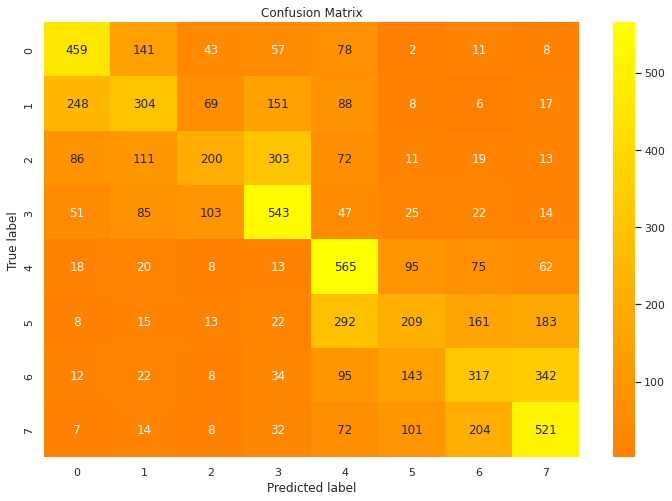

In [ ]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#submitted 39: random_state=42, n_estimators=200,criterion='entropy',bootstrap= False,max_depth= 11,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 2)
#overfiited fail : 'bootstrap': False, 'max_depth': 34, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150
rf = RandomForestClassifier(random_state=42, n_estimators=200,criterion='entropy',bootstrap= False,max_depth= 11,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 2)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

0.8449860892705939
0.6418289585097375


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test_rf))
print(f"Accuracy score: {accuracy_score(y_test,y_predict_test_rf)}")

              precision    recall  f1-score   support

           0       0.75      0.68      0.72       799
           1       0.64      0.57      0.60       891
           2       0.51      0.43      0.47       815
           3       0.54      0.75      0.63       890
           4       0.65      0.65      0.65       856
           5       0.63      0.55      0.59       903
           6       0.72      0.69      0.71       973
           7       0.70      0.78      0.74       959

    accuracy                           0.64      7086
   macro avg       0.64      0.64      0.64      7086
weighted avg       0.64      0.64      0.64      7086

Accuracy score: 0.6418289585097375


In [ ]:
from sklearn.metrics import f1_score
print(f"f1_score-macro: {f1_score(y_test,y_predict_test_rf, average='macro')}")

f1_score-macro: 0.6371596446166226


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, Y, cv=5)
print(scores)

[0.58869602 0.61960203 0.66998307 0.66215072 0.6822608 ]


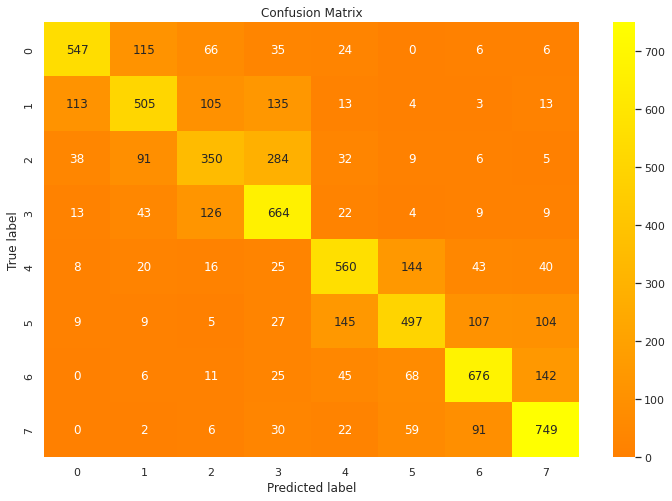

In [ ]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)

In [ ]:
# save
import joblib
#joblib.dump(rf, "./rf_imb_fe_hp_7079.joblib")

['./rf_os_fe_hp_70 79.joblib']

In [ ]:
#sns.pairplot(df_train_enc.drop('primary_identifier', axis=1), aspect=1.5)
#plt.show()

# Predicting

In [ ]:
# load rf
loaded_rf = joblib.load("./rf_imb_fe_hp_7079.joblib")

In [ ]:
print(X_tesing.shape)

(4500, 21)


In [ ]:
#y_result_test_logreg = logreg.predict(X_test)
y_result_test_rf = rf.predict(X_tesing)

#y_result_pkg_logreg=le.inverse_transform(y_result_test_logreg)
y_result_pkg_rf=le.inverse_transform(y_result_test_rf)
y_result_pkg_rf

array(['PKG1', 'PKG1', 'PKG3', ..., 'PKG3', 'PKG7', 'PKG3'], dtype=object)

In [ ]:
d={'primary_identifier':list(df_tesing['primary_identifier']),'next_month_plan_pkg':y_result_pkg_rf,'next_month_plan_code':y_result_test_rf}
results_df = pd.DataFrame(d)
results_df

,primary_identifier,next_month_plan_pkg,next_month_plan_code
0,2003793,PKG1,0
1,1776101,PKG1,0
2,6945050,PKG3,2
3,2472049,PKG1,0
4,7197266,PKG5,4
...,...,...,...
4495,8830679,PKG8,7
4496,3839728,PKG3,2
4497,2166141,PKG3,2
4498,9426198,PKG7,6


In [ ]:
len(y_result_test_rf)

4500

In [ ]:
results_df.to_csv('rf_imb_fe_hp_7079.csv')

# calculated fields

In [ ]:
df_train_cal=df_train_smt
df_train_cal['log10_add_on_tot_rental'] = np.log10(df_train_smt.add_on_tot_rental + 0.00001)
df_train_cal['log10_average_monthly_bill_amount'] = np.log10(df_train_smt.average_monthly_bill_amount + 0.00001)
df_train_cal=df_train_cal.drop(['add_on_tot_rental','average_monthly_bill_amount'],axis=1)

df_test_cal=df_test_enc
df_test_cal['log10_add_on_tot_rental'] = np.log10(df_test_enc.add_on_tot_rental + 0.00001)
df_test_cal['log10_average_monthly_bill_amount'] = np.log10(df_test_enc.average_monthly_bill_amount + 0.00001)
df_test_cal=df_test_cal.drop(['add_on_tot_rental','average_monthly_bill_amount'],axis=1)

df_train_cal.log10_add_on_tot_rental.fillna(np.log10(0.00001),inplace=True)
df_train_cal.log10_average_monthly_bill_amount.fillna(np.log10(0.00001),inplace=True)
df_test_cal.log10_add_on_tot_rental.fillna(np.log10(0.00001),inplace=True)
df_test_cal.log10_average_monthly_bill_amount.fillna(np.log10(0.00001),inplace=True)

In [ ]:
features = ['add_on_tot_rental','log10_add_on_tot_rental','add_on_tot_rental','log10_average_monthly_bill_amount']
for col in features:
    df_train_cal.boxplot(column=col, by='next_month_plan', figsize=(6,6))
    plt.title(col)
plt.show()